In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
heart_attack = pd.read_csv(r"Heart Attack Prediction dataset\heart.csv")
heart_attack.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
#getting dataset's information checking for NAN values
heart_attack.info()
#heart_attack.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


<AxesSubplot:xlabel='Cholesterol', ylabel='MaxHR'>

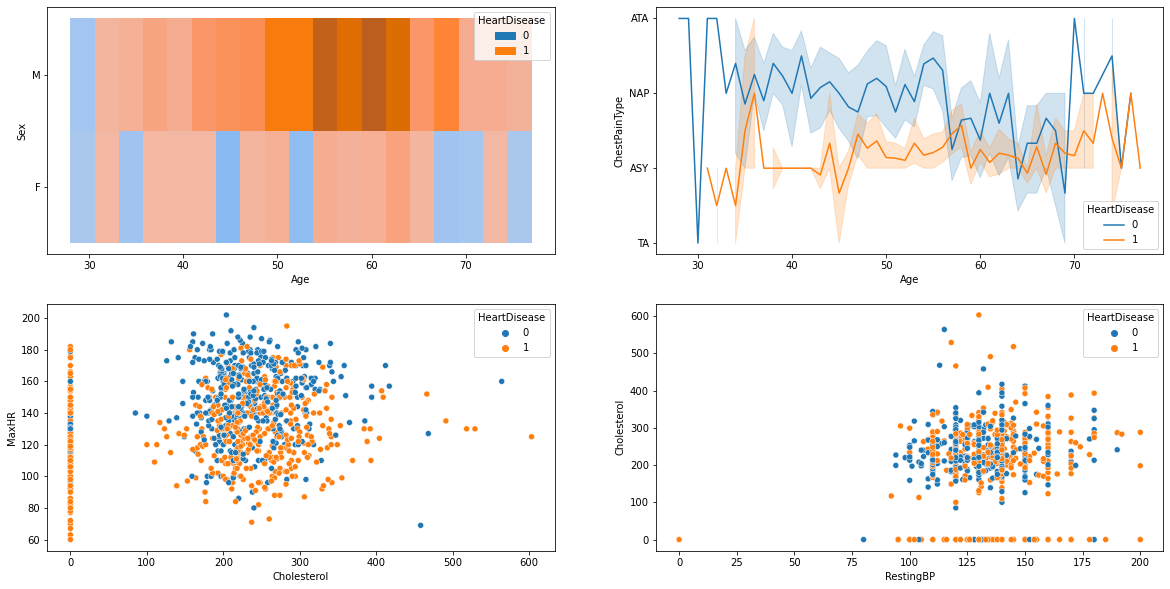

In [4]:
#Visvalizhing data
figs,axs = plt.subplots(2,2,figsize=(20,10))
sns.histplot(x=heart_attack.iloc[:,0],y=heart_attack.iloc[:,1],hue=heart_attack.iloc[:,11],ax=axs[0,0])
sns.lineplot(x=heart_attack.iloc[:,0],y=heart_attack.iloc[:,2],hue=heart_attack.iloc[:,11],ax=axs[0,1])
sns.scatterplot(x=heart_attack.iloc[:,3],y=heart_attack.iloc[:,4],hue=heart_attack.iloc[:,11],ax=axs[1,1])
sns.scatterplot(x=heart_attack.iloc[:,4],y=heart_attack.iloc[:,7],hue=heart_attack.iloc[:,11],ax=axs[1,0])

In [5]:
#replacing String to numarics in the dataset
list_ = []
for i in range(12):
    list_.append([heart_attack.columns[i],heart_attack.iloc[:,i].unique()])
list_
heart_attack.iloc[:,1]=heart_attack.iloc[:,1].replace({'M':1,'F':2})
heart_attack.iloc[:,2]=heart_attack.iloc[:,2].replace({'ATA':1, 'NAP':2, 'ASY':3, 'TA':4})
heart_attack.iloc[:,6]=heart_attack.iloc[:,6].replace({'Normal':1, 'ST':2, 'LVH':3})
heart_attack.iloc[:,8]=heart_attack.iloc[:,6].replace({'N':0, 'Y':1})
heart_attack.iloc[:,10]=heart_attack.iloc[:,10].replace({'Up':0, 'Flat':1, 'Down':2})
heart_attack.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,0,0
1,49,2,2,160,180,0,1,156,1,1.0,1,1
2,37,1,1,130,283,0,2,98,2,0.0,0,0
3,48,2,3,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,1,0.0,0,0


In [6]:
# splitting data
X = heart_attack.iloc[:,:11]
Y = heart_attack.iloc[:,11]
xTrain, xText, yTrain, yTest = train_test_split(X,Y,test_size=1/4,random_state=30)

In [7]:
# using Navie Bayes algoritham
from sklearn.naive_bayes import GaussianNB
G_NBmodel = GaussianNB()

In [8]:
G_NBmodel.fit(xTrain,yTrain)

GaussianNB()

accuracy_score: 0.8478260869565217 

classification_report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       103
           1       0.85      0.88      0.86       127

    accuracy                           0.85       230
   macro avg       0.85      0.84      0.85       230
weighted avg       0.85      0.85      0.85       230
 

confusion_matrix:
 [[ 83  20]
 [ 15 112]]


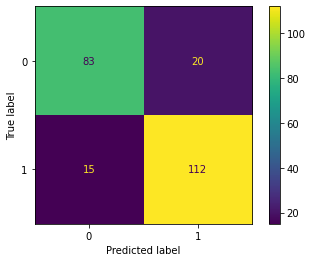

In [9]:
G_NB_y_predition = G_NBmodel.predict(xText)
print('accuracy_score:',accuracy_score(yTest,G_NB_y_predition),
     '\n\nclassification_report:\n',classification_report(yTest,G_NB_y_predition),
     '\n\nconfusion_matrix:\n',confusion_matrix(yTest,G_NB_y_predition))
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(yTest,G_NB_y_predition))
display.plot()

In [10]:
#using Decission Tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini',random_state=10,max_depth=5,min_samples_leaf=8)

In [11]:
tree_model.fit(xTrain,yTrain)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, random_state=10)

accuracy_score: 0.8565217391304348 

classification_report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       103
           1       0.87      0.87      0.87       127

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230
 

confusion_matrix:
 [[ 87  16]
 [ 17 110]]


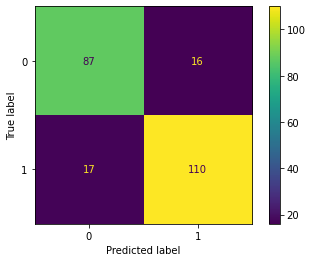

In [12]:
tree_y_predict = tree_model.predict(xText)
print('accuracy_score:',accuracy_score(yTest,tree_y_predict),
     '\n\nclassification_report:\n',classification_report(yTest,tree_y_predict),
     '\n\nconfusion_matrix:\n',confusion_matrix(yTest,tree_y_predict))

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(yTest,tree_y_predict))
display.plot()

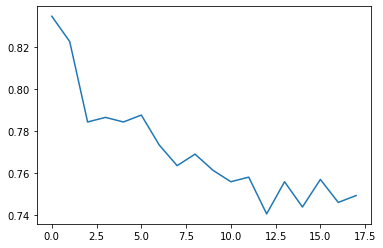

In [55]:
# using KNN finding the best value for K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
score = []

for i in range(2,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,Y)
    prediction = knn.predict(X)
    accuracy = accuracy_score(prediction,Y)
    score.append(np.mean(accuracy))
    
plt.plot(score)

In [56]:
#Creating KNNmodel
knn_model = KNeighborsClassifier(n_neighbors=5)

In [57]:
knn_model.fit(xTrain,yTrain)
knn_y_predict = knn_model.predict(xText)

accuracy_score: 0.7086956521739131 

classification_report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.67       103
           1       0.73      0.74      0.74       127

    accuracy                           0.71       230
   macro avg       0.71      0.71      0.71       230
weighted avg       0.71      0.71      0.71       230
 

confusion_matrix:
 [[69 34]
 [33 94]] 

mean_absolute_error: 0.29130434782608694


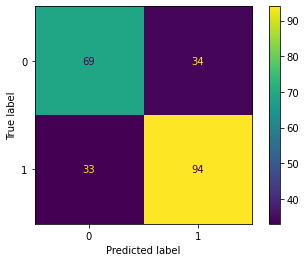

In [58]:
tree_y_predict = tree_model.predict(xText)
print('accuracy_score:',accuracy_score(yTest,knn_y_predict),
     '\n\nclassification_report:\n',classification_report(yTest,knn_y_predict),
     '\n\nconfusion_matrix:\n',confusion_matrix(yTest,knn_y_predict),
     '\n\nmean_absolute_error:',mean_absolute_error(yTest,knn_y_predict))

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(yTest,knn_y_predict))
display.plot()

In [17]:
data = np.array(heart_attack.iloc[915,:11]).reshape(1,-1)
data = np.array(heart_attack.iloc[917,:11]).reshape(1,-1)
prediction = G_NBmodel.predict(data)
print('Prediction:',prediction)
prediction = tree_model.predict(data)
print('Prediction:',prediction)
prediction = knn_model.predict(data)
print('Prediction:',prediction)
heart_attack.tail(3)

Prediction: [0]
Prediction: [0]
Prediction: [0]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
915,57,1,3,130,131,0,1,115,1,1.2,1,1
916,57,2,1,130,236,0,3,174,3,0.0,1,1
917,38,1,2,138,175,0,1,173,1,0.0,0,0


<AxesSubplot:title={'center':'Actual vs Predited output\nKNN classification'}, xlabel='HeartDisease', ylabel='Density'>

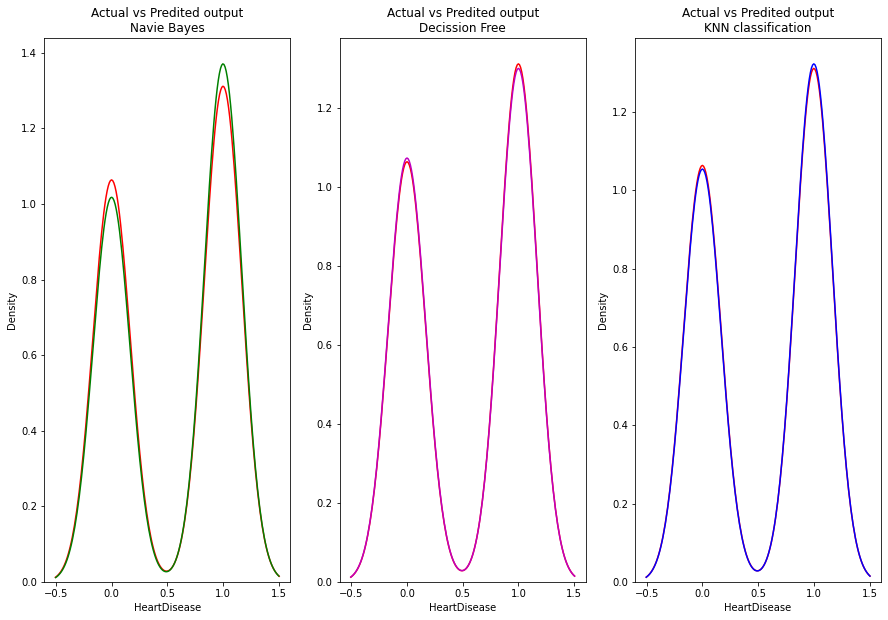

In [18]:
fig,axs = plt.subplots(1,3,figsize=(15,10))
axs[0].set_title('Actual vs Predited output\nNavie Bayes')
sns.distplot(yTest, hist=False, color="r", label="Actual Value",ax=axs[0])
sns.distplot(G_NB_y_predition, hist=False, color="g", label="Predicted Value",ax=axs[0])
axs[1].set_title('Actual vs Predited output\nDecission Free')
sns.distplot(yTest, hist=False, color="r", label="Actual Value",ax=axs[1])
sns.distplot(tree_y_predict, hist=False, color="m", label="Predicted Value",ax=axs[1])
axs[2].set_title('Actual vs Predited output\nKNN classification')
sns.distplot(yTest, hist=False, color="r", label="Actual Value",ax=axs[2])
sns.distplot(knn_y_predict, hist=False, color="blue", label="Predicted Value",ax=axs[2])

In [ ]:
Since it is a binary classification all the algorithams have came up with a good result. Overall Decission tree have
high accuracy of 85% followed by Navie Bayes with 84% accuracy. As KNN classifies an instance by finding the k nearest 
it have accuracy of 70% which is pretty decent.